In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import math 

Problemas cap 5 Bola de Ténis


3. Uma bola de ténis é batida junto ao solo (posição inicial y = 0) com a velocidade 100 km/h, a fazer um 
ângulo de 10º com a horizontal e no sentido positivo dum eixo horizontal OX, sendo OY eixo vertical. 


a) Calcula a energia mecânica em qualquer instante, no caso de nao considerar a reistencia de ar


In [2]:
import matplotlib.pyplot as plt
import numpy as np


def euler():
    dt = 0.01
    tf = 0.8
    n = int(tf/dt+0.1)

    t = np.empty(n)
    vy = np.empty(n)
    ay = np.empty(n)
    y = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)
    z = np.empty(n)
    vz = np.empty(n)
    az = np.empty(n)
    w = np.array([0, 0, 0])
    v = np.array([27.36, 4.82, 0])#velocidade decomposta for forcas isto é vx,vy e vz
    r = np.array([0, 0, 0]) #rotação
    EC = np.empty(n)
    EP = np.empty(n)
    E = np.empty(n)

    M = 0.057 #massa
    g = 9.80
    vy[0] = v[1]
    t[0] = 0
    y[0] = r[1]
    x[0] = r[0]
    z[0] = r[2]
    vx[0] = v[0]
    vz[0] = v[2]

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i] = 0
        ay[i] = -g #sendo que a bola está a cair e o eixo é o OY a acelaração é negativa
        az[i] = 0
        vy[i+1] = vy[i]+ay[i]*dt
        vx[i+1] = vx[i]+ax[i]*dt
        vz[i+1] = vz[i]+az[i]*dt
        x[i+1] = x[i]+vx[i]*dt
        y[i+1] = y[i]+vy[i]*dt
        z[i+1] = z[i]+vz[i]*dt

        EC[i] = 0.5*M*np.linalg.norm(np.array([vx[i], vy[i], vz[i]]))**2
        EP[i] = M*g*y[i]
        E[i] = EC[i] + EP[i]

    return t, y, vy, x, vx, z, vz, n, EC, EP, E

t, y, vy, x, vx, z, vz, n, EC, EP, E = euler()



print(f"Energia mecanica: {E[1]:.2f} J\n") #nao varia o valor, há conservação de energia



Energia mecanica: 22.00 J



Outra alternativa


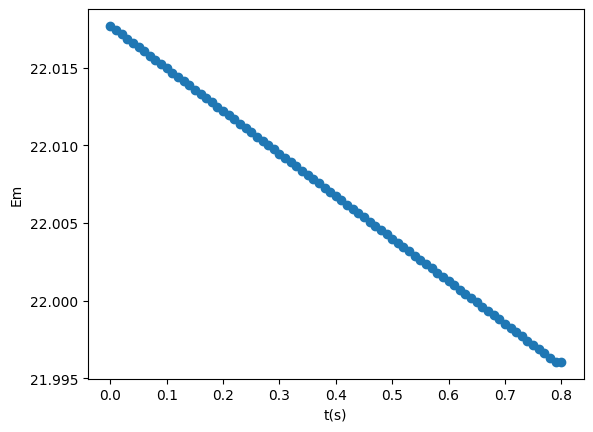

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math 

g=9.8
m=0.057

dt=0.01
t0=0
tf=0.8
N=int(np.ceil((tf-t0)/dt+1))
t=np.linspace(t0,tf,N)

x=np.zeros(N)
y=np.zeros(N)
v=np.zeros(N)
vx=np.zeros(N)
vy=np.zeros(N)
Em=np.zeros(N)


v0=100/3.6
ang=math.radians(10)

[x[0],y[0],vx[0],vy[0],v[0]]=[0,0,v0*math.cos(ang),v0*math.sin(ang),v0]

for i in range(N-1):
    x[i+1]=x[i]+vx[i]*dt
    y[i+1]=y[i]+vy[i]*dt
    vx[i+1]=vx[i]
    vy[i+1]=vy[i]-g*dt
    v[i+1]=np.sqrt(vx[i+1]**2 + vy[i+1]**2)
    Em[i]=m*g*y[i+1]+0.5*m*(v[i]**2)

Em[-1]=Em[-2]
fig,ax=plt.subplots()
ax.plot(t,Em,"o")
ax.set_ylabel("Em")
ax.set_xlabel("t(s)")
plt.show()

b)Considerando a resistencia do ar, calcula a energia mecanica de t0=0 até tf=0.8s

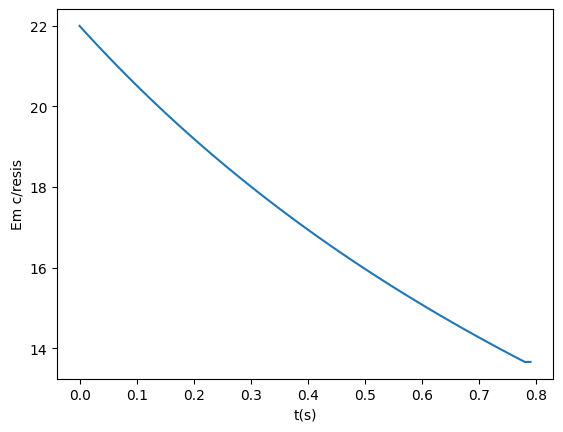

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def euler():
    dt = 0.01
    tf = 0.8
    n = int(tf/dt+0.1)

    t = np.empty(n)
    vy = np.empty(n)
    ay = np.empty(n)
    y = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)
    z = np.empty(n)
    vz = np.empty(n)
    az = np.empty(n)
    w = np.array([0, 0, 0])
    v = np.array([27.36, 4.82, 0])#velocidade decomposta for forcas isto é vx,vy e vz
    r = np.array([0, 0, 0]) #rotação
    EC = np.empty(n)
    EP = np.empty(n)
    E = np.empty(n)

    M = 0.057 #massa
    g = 9.80
    vy[0] = v[1]
    t[0] = 0
    y[0] = r[1]
    x[0] = r[0]
    z[0] = r[2]
    vx[0] = v[0]
    vz[0] = v[2]
    D = g/(vx[0]**2)

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i] = -D*np.abs(np.sqrt(vx[i]**2 +vy[i]**2))*vx[i]
        ay[i] = -g-D*abs(vy[i])*vy[i]
        az[i] = 0
        vy[i+1] = vy[i]+ay[i]*dt
        vx[i+1] = vx[i]+ax[i]*dt
        vz[i+1] = vz[i]+az[i]*dt
        x[i+1] = x[i]+vx[i]*dt
        y[i+1] = y[i]+vy[i]*dt
        z[i+1] = z[i]+vz[i]*dt

        EC[i] = 0.5*M*np.linalg.norm(np.array([vx[i], vy[i], vz[i]]))**2
        EP[i] = M*g*y[i]
        E[i] = EC[i] + EP[i]

    return t, y, vy, x, vx, z, vz, n, EC, EP, E

t, y, vy, x, vx, z, vz, n, EC, EP, E = euler()

E[-1]=E[-2]
plt.plot(t,E)
plt.xlabel("t(s)")
plt.ylabel("Em c/resis")
plt.show()



c).
Use a aproximação trapezoidal para calcular os integrais. A velocidade terminal da bola de ténis é 100 km/h. AS 
massa da bola é 57 

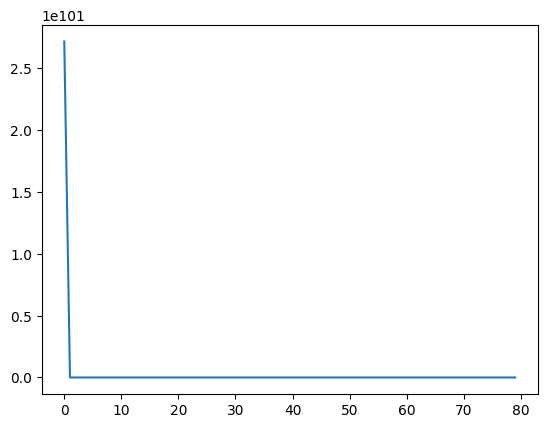

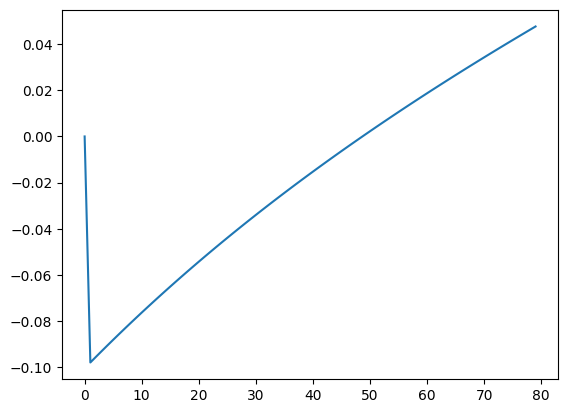

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def euler():
    dt = 0.01
    tf = 0.8
    n = int(tf/dt+0.1)

    t = np.empty(n)
    vy = np.empty(n)
    ay = np.empty(n)
    y = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)
    z = np.empty(n)
    vz = np.empty(n)
    az = np.empty(n)
    w = np.array([0, 0, 0])
    v = np.array([27.36, 4.82, 0])#velocidade decomposta for forcas isto é vx,vy e vz
    r = np.array([0, 0, 0]) #rotação
    EC = np.empty(n)
    EP = np.empty(n)
    E = np.empty(n)
    Fresx=np.empty(n)
    Fresy=np.empty(n)

    M = 0.057 #massa
    g = 9.80
    vy[0] = v[1]
    t[0] = 0
    y[0] = r[1]
    x[0] = r[0]
    z[0] = r[2]
    vx[0] = v[0]
    vz[0] = v[2]
    D = g/(vx[0]**2)

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i] = -D*np.abs(np.sqrt(vx[i]**2 +vy[i]**2))*vx[i]
        ay[i] = -g-D*abs(vy[i])*vy[i]
        az[i] = 0
        vy[i+1] = vy[i]+ay[i]*dt
        vx[i+1] = vx[i]+ax[i]*dt
        vz[i+1] = vz[i]+az[i]*dt
        x[i+1] = x[i]+vx[i]*dt
        y[i+1] = y[i]+vy[i]*dt
        z[i+1] = z[i]+vz[i]*dt

        EC[i] = 0.5*M*np.linalg.norm(np.array([vx[i], vy[i], vz[i]]))**2
        EP[i] = M*g*y[i]
        E[i] = EC[i] + EP[i]

        Fresx[i+1]=-m*D*np.abs(np.sqrt(vx[i]**2 +vy[i]**2))*vx[i+1]
        Fresy[i+1]=-m*D*np.abs(np.sqrt(vx[i]**2 +vy[i]**2))*vy[i+1]

    return t, y, vy, x, vx, z, vz, n, EC, EP,E, Fresx,Fresy

t, y, vy, x, vx, z, vz, n, EC, EP, E,Fresx,Fresy = euler()

plt.plot(Fresx)
plt.show()
plt.plot(Fresy)
plt.show()




a) Nas mesmas condições do problema anterior, repete o calculo do trabalho realizado pela força de resistência do ar
no instante 4; = 0.4 s, usando os seguintes valores de dt:
(0.1,0.01, 0.001, 0.0001, 0.00001)


In [6]:
m = 0.057

dt = [0.1, 0.01, 0.001, 0.0001, 0.00001]
t0 = 0
tf = 0.8

Wexato = -4.9768522
erro =  np.zeros(len(dt))

for j in range(len(dt)):
    
    N = int((np.ceil((tf-t0)/dt[j]))) + 1   
    print('N = ', N)
    t = np.linspace(t0, tf, N+1)

    vx = np.zeros(N+1)
    vy = np.zeros(N+1)
    ax = np.zeros(N+1)
    ay = np.zeros(N+1)
    x = np.zeros(N+1)
    y = np.zeros(N+1)

    v = np.zeros(N+1)

    x[0] = 0
    y[0] = 0

    v0 = 100/3.6
    teta = np.radians(10)
    vx[0] = v0*np.cos(teta)
    vy[0] = v0*np.sin(teta)

    vt = 100/3.6
    g = 9.8
    d = g/vt**2

    FresX = np.zeros(N+1)
    FresY = np.zeros(N+1)
    Fres = np.zeros(N+1)
    Wx = np.zeros(N+1)
    Wy = np.zeros(N+1)
    W = np.zeros(N+1)
    
    for i in range(N):
        v[i] = np.sqrt(vx[i]**2 + vy[i]**2)
        
        ax[i] = -d*vx[i]*abs(v[i])
        ay[i] = -g - d*abs(v[i])*vy[i]
    
        vy[i+1] = vy[i] + ay[i]*dt[j]
        vx[i+1] = vx[i] + ax[i]*dt[j]
    
        y[i+1] = y[i] + vy[i] * dt[j]
        x[i+1] = x[i] + vx[i] * dt[j]
    
        FresX[i] = m*-d*v[i]*vx[i]
        FresY[i] = m*-d*v[i]*vy[i]
        Fres[i] = FresX[i] + FresY[i]
    
        Wx[i] = dt[j] * ((FresX[0]*vx[0] * 0.5 + np.sum(FresX[1:i]*vx[1:i]) + FresX[i]*vx[i] * 0.5))
        
        Wy[i] = dt[j] * ((FresY[0]*vy[0] * 0.5 + np.sum(FresY[1:i]*vy[1:i]) + FresY[i]*vy[i] * 0.5))
        
        W[i] = Wx[i] + Wy[i]
        
        
    Wx[N] = dt[j] * ((FresX[0]*vx[0] * 0.5 + np.sum(FresX[1:N]*vx[1:N]) + FresX[N]*vx[N] * 0.5))   
    Wy[N] = dt[j] * ((FresY[0]*vy[0] * 0.5 + np.sum(FresY[1:N]*vy[1:N]) + FresY[N]*vy[N] * 0.5))
    W[N] = Wx[N] + Wy[N]
    
    print("Para um dt = {:.5f}: Trabalho em 0.4s -> {:.7f}".format(dt[j], W[round(0.4/dt[j])]))
    print()
    erro[j] = np.abs(W[round(0.4/dt[j])]-Wexato)

print(erro)
print(np.log(erro))

N =  9
Para um dt = 0.10000: Trabalho em 0.4s -> -4.9504745

N =  81
Para um dt = 0.01000: Trabalho em 0.4s -> -4.9735754

N =  801
Para um dt = 0.00100: Trabalho em 0.4s -> -4.9765186

N =  8001
Para um dt = 0.00010: Trabalho em 0.4s -> -4.9768188

N =  80001
Para um dt = 0.00001: Trabalho em 0.4s -> -4.9768489

[2.63776966e-02 3.27678009e-03 3.33631511e-04 3.33654605e-05
 3.27970348e-06]
[ -3.63523645  -5.72089402  -8.00547343 -10.30798931 -12.62775754]


b) Faça um plot em escala log-log do erro (W/(81) - W/ (exato) | nos valores do trabalho calculado em a), em função de
§t.
Para o valor exato do trabalho use W(exato) = -4.9768522).
Qual é a ordem do erro em termos de St?


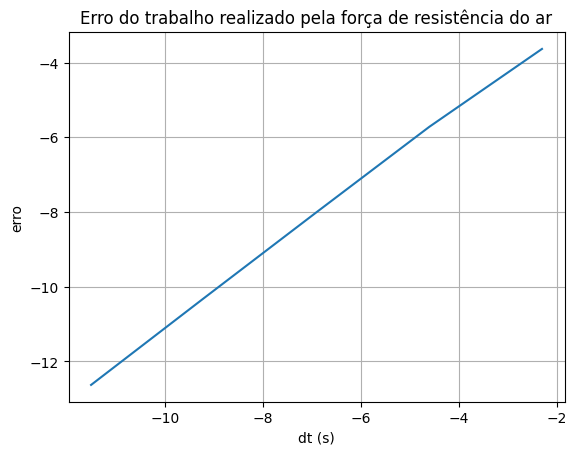

In [7]:
plt.plot(np.log(dt), np.log(erro))
plt.title("Erro do trabalho realizado pela força de resistência do ar")
plt.xlabel("dt (s)")
plt.ylabel("erro")
plt.grid()
plt.show()

c) Repete alinhas a) e b) usando a aproximação retangular para calcular os integrais. Qual o ordem do erro? Qual dos métodos é preferível usar?

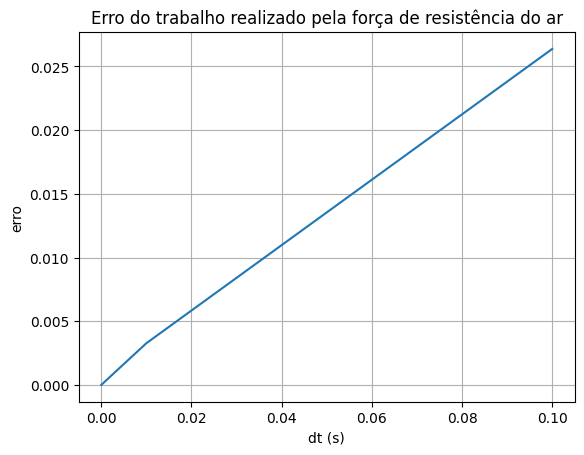

In [8]:


plt.plot(dt, erro)
plt.title("Erro do trabalho realizado pela força de resistência do ar")
plt.xlabel("dt (s)")
plt.ylabel("erro")
plt.grid()
plt.show()
